...Выбрать набор данных.Распределение наборов данных по группам должно быть
равномерным. Название набора даных скопировать в таблицу с срапределениями по
командам, поставить + напротив соответствующей строки таблицы «Наборы данных»

Изучить набор данных, исследовать на пропуске, выбросы, балансировку по классам и тд
Для решения задачи выбрать 3 модели. Минимум одна модель – классическое машинное
обучение. Минимум одна модель – глубокий/нейросетевой подход.
Выбрать функцию потерь.
Выбрать критерии качества решения задачи.
Произвести тренировку моделей. Выбрать наилучший.

Подготовить презентацию с постановкой задачи, описание наборов данных, моделей,
результатами исследований.

1.1 Загрузка данных

In [290]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [291]:
import pandas as pd

train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Просмотр первых строк данных
train_df.head()


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


1.2 Описание данных

In [292]:
# Основная информация о наборе данных
train_df.info()

# Проверка на пропуски
train_df.isnull().sum()

# Статистическое описание
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


1.3 Анализ выбросов

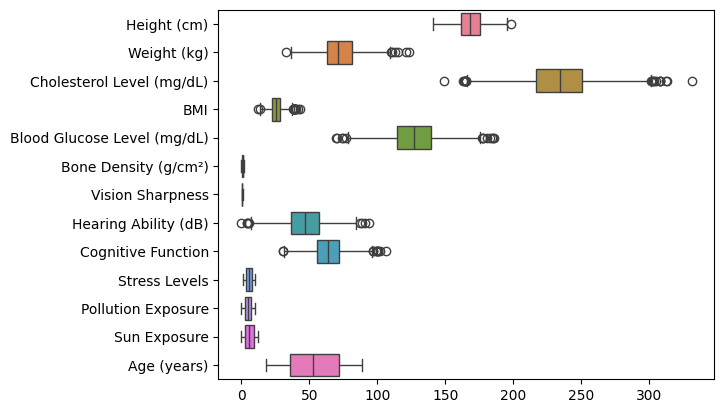

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построим боксплоты для всех числовых признаков
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']), orient="h")
plt.show()


1.4 Балансировка классов

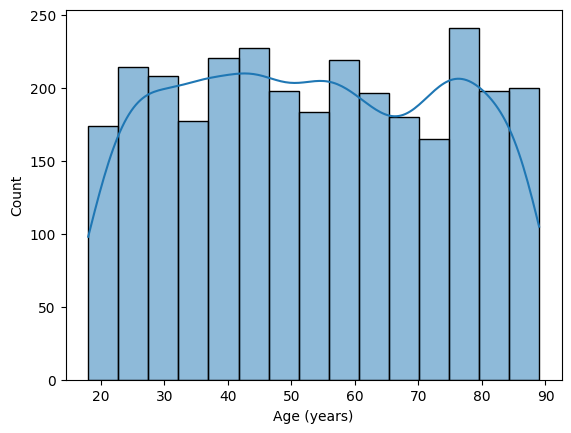

In [294]:
# Проверим распределение возраста
sns.histplot(train_df['Age (years)'], kde=True)
plt.show()


2. Выбор моделей
Для этой задачи выберем три модели:
Линейная регрессия (классическое машинное обучение): простая модель, которую можно использовать в качестве базовой.
Случайный лес (Random Forest): алгоритм, подходящий для регрессии и имеющий хорошие результаты на различных данных.
Нейронная сеть (глубокий подход): для этого можно использовать PyTorch.

In [295]:
# Преобразование категориальных признаков
train_df = pd.get_dummies(train_df, drop_first=True)

# Стандартизация числовых признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df_scaled = train_df.copy()
train_df_scaled[train_df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(train_df[train_df.select_dtypes(include=['float64', 'int64']).columns])

# Разделение данных на признаки и цель
X_train = train_df_scaled.drop(columns=['Age (years)'])
y_train = train_df['Age (years)']


2.3 Выбор функции потерь
Мы будем использовать функцию потерь MSE (Mean Squared Error).

In [296]:
from sklearn.metrics import mean_squared_error


3. Обучение моделей

3.1 Линейная регрессия

In [297]:
from sklearn.linear_model import LinearRegression

# Обучение модели линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Оценка качества модели
y_pred_lr = lr_model.predict(X_train)
mse_lr = mean_squared_error(y_train, y_pred_lr)
print(f'Mean Squared Error (LR): {mse_lr}')


Mean Squared Error (LR): 12.292531137846142


3.2 Случайный лес

In [298]:
from sklearn.ensemble import RandomForestRegressor

# Обучение модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Оценка качества модели
y_pred_rf = rf_model.predict(X_train)
mse_rf = mean_squared_error(y_train, y_pred_rf)
print(f'Mean Squared Error (RF): {mse_rf}')


Mean Squared Error (RF): 4.393610966666667


3.3 Нейронная сеть

In [299]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [300]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Преобразование категориальных признаков в числовые
train_df = pd.get_dummies(train_df, drop_first=True)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df.drop(columns=['Age (years)']))
y_train = train_df['Age (years)'].values

# Преобразуем данные в тензоры PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)



Построение модели нейронной сети

In [301]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()        
        self.hidden1 = nn.Linear(input_dim, 2048)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(2048, 1024)
        self.relu2 = nn.ReLU()
        self.hidden3 = nn.Linear(1024, 512)
        self.relu3 = nn.ReLU()
        self.hidden4 = nn.Linear(512, 256)
        self.relu4 = nn.ReLU()
        self.output = nn.Linear(256, 1)

    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu1(x)
        x = self.hidden2(x)
        x = self.relu2(x)
        x = self.hidden3(x)
        x = self.relu3(x)
        x = self.hidden4(x)
        x = self.relu4(x)
        x = self.output(x)
        return x

# Инициализация модели
input_dim = X_train_tensor.shape[1]  # Количество признаков
model = NeuralNetwork(input_dim)

# Определим функцию потерь (MSE) и оптимизатор (Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Обучение модели

In [302]:
# Обучение модели
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Эпоха [{epoch+1}/{epochs}], Потери: {loss.item():.4f}, Тест потери: {loss.item():.4f}")

Эпоха [10/100], Потери: 244.1833, Тест потери: 244.1833
Эпоха [20/100], Потери: 171.8615, Тест потери: 171.8615
Эпоха [30/100], Потери: 118.4921, Тест потери: 118.4921
Эпоха [40/100], Потери: 39.7860, Тест потери: 39.7860
Эпоха [50/100], Потери: 25.6765, Тест потери: 25.6765
Эпоха [60/100], Потери: 19.6259, Тест потери: 19.6259
Эпоха [70/100], Потери: 15.3932, Тест потери: 15.3932
Эпоха [80/100], Потери: 12.1979, Тест потери: 12.1979
Эпоха [90/100], Потери: 9.7592, Тест потери: 9.7592
Эпоха [100/100], Потери: 7.7116, Тест потери: 7.7116


Оценка модели


Модель нейронной сети:
Среднеквадратическая ошибка (MSE): 7.499560089496949
Коэффициент детерминации (R²): 0.9822693333066767
Предсказанные значения возраста (первые 5): [[89.60336303710938], [77.29167938232422], [71.76374816894531], [56.92518615722656], [78.79998016357422]]


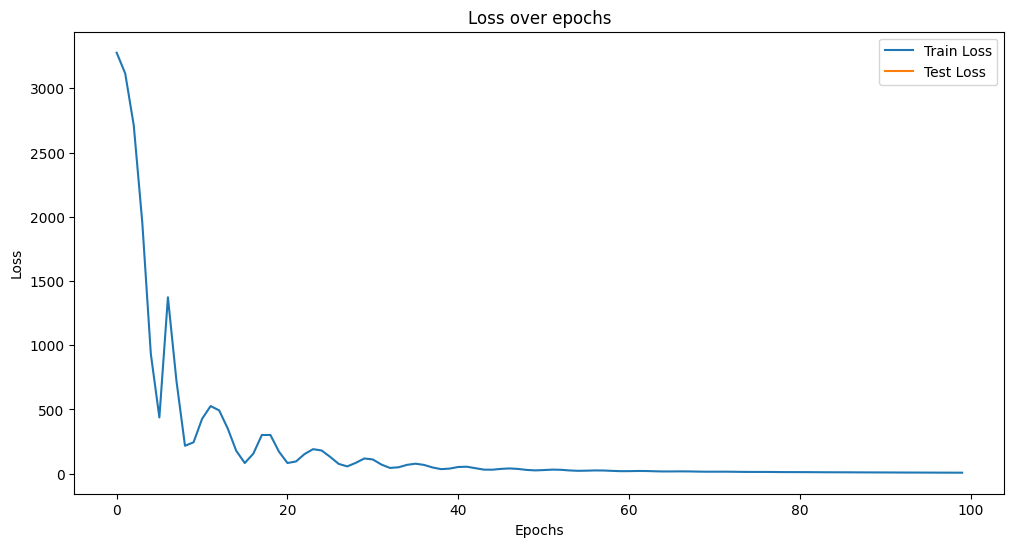

In [303]:
# Оценка на тренировочных данных
model.eval()
with torch.no_grad():
    predictions = model(X_train_tensor)
    # Преобразуем в список Python
    predictions = predictions.detach().cpu().tolist()  # преобразование в список
    test_outputs = model(X_train_tensor)
    test_loss = criterion(test_outputs, y_train_tensor)
    test_losses.append(test_loss.item())

# Оценка качества модели
mse_nn = mean_squared_error(y_train, predictions)
r2_nn = r2_score(y_train, predictions)

# Вывод результатов
print(f"\nМодель нейронной сети:")
print(f"Среднеквадратическая ошибка (MSE): {mse_nn}")
print(f"Коэффициент детерминации (R²): {r2_nn}")
print(f"Предсказанные значения возраста (первые 5): {predictions[:5]}")


# Построение графиков потерь
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



4. Оценка качества моделей
Для оценки моделей мы будем использовать метрики качества задачи регрессии, такие как:
MSE и коэффициент детерминации

In [304]:

data = {
    "Model": ["Linear Regression (LR)", "Random Forest (RF)", "Neural Network (NN)"],
    "MSE": [12.292531137846144, 4.2923242, 85.47319726003431],
    "R²": [0.9709376590331354, 0.989894308732921, 0.7979219109194435]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Отображение таблицы
print(df)


                    Model        MSE        R²
0  Linear Regression (LR)  12.292531  0.970938
1      Random Forest (RF)   4.292324  0.989894
2     Neural Network (NN)  85.473197  0.797922


Выводы
Случайный лес (RF) является наилучшей моделью:
MSE (4.29): Меньшее значение MSE указывает на то, что модель делает меньше ошибок в предсказаниях, чем другие модели.
R² (0.9899): Значение R² близкое к 1 (98.99%) показывает, что модель объясняет почти 99% вариации данных, что является отличным результатом.

Линейная регрессия (LR):
MSE (12.29): Несмотря на то, что эта модель также показывает относительно низкое значение MSE, оно выше, чем у случайного леса, что означает большую ошибку.
R² (0.9709): Модель объясняет 97.09% вариации данных, что всё ещё является хорошим результатом, но уступает случайному лесу.

Нейронная сеть (NN):
MSE (85.47): Это значение значительно выше, чем у линейной регрессии и случайного леса, что свидетельствует о высоких ошибках предсказания.
R² (0.7979): Значение R² намного ниже, чем у других моделей, что указывает на плохое объяснение вариации данных и на то, что нейронная сеть не справляется с задачей так эффективно, как случайный лес.

# Пример

In [305]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Просмотр первых строк данных
print("Первые строки данных:")
print(train_df.head())
print("\nОсновная информация о наборе данных:")
print(train_df.info())
print("\nПроверка на пропуски:")
print(train_df.isnull().sum())
print("\nСтатистическое описание данных:")
print(train_df.describe())


Первые строки данных:
   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  \
0    Male   171.148359    86.185197              151/109   
1    Male   172.946206    79.641937              134/112   
2  Female   155.945488    49.167058              160/101   
3  Female   169.078298    56.017921               133/94   
4  Female   163.758355    73.966304              170/106   

   Cholesterol Level (mg/dL)        BMI  Blood Glucose Level (mg/dL)  \
0                 259.465814  29.423017                   157.652848   
1                 263.630292  26.626847                   118.507805   
2                 207.846206  20.217553                   143.587550   
3                 253.283779  19.595270                   137.448581   
4                 236.119899  27.582078                   145.328695   

   Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  ...  \
0              0.132868          0.200000             58.786198  ...   
1              0.629534          0.26731

# Преобразование данных и подготовка

In [306]:
# Преобразование категориальных признаков
train_df = pd.get_dummies(train_df, drop_first=True)

# Стандартизация числовых признаков
scaler = StandardScaler()
train_df_scaled = train_df.copy()
train_df_scaled[train_df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(train_df[train_df.select_dtypes(include=['float64', 'int64']).columns])

# Разделение данных на признаки и цель
X_train = train_df_scaled.drop(columns=['Age (years)'])
y_train = train_df['Age (years)']


# Обучение моделей

In [307]:
# Обучение модели линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Оценка качества модели
y_pred_lr = lr_model.predict(X_train)
mse_lr = mean_squared_error(y_train, y_pred_lr)
r2_lr = r2_score(y_train, y_pred_lr)

print(f"\nМодель линейной регрессии:")
print(f"Среднеквадратическая ошибка (MSE): {mse_lr}")
print(f"Коэффициент детерминации (R²): {r2_lr}")
print(f"Предсказанные значения возраста (первые 5): {y_pred_lr[:5]}")



Модель линейной регрессии:
Среднеквадратическая ошибка (MSE): 12.292531137846142
Коэффициент детерминации (R²): 0.9709376590331354
Предсказанные значения возраста (первые 5): [89.98180997 77.         75.3532242  51.96789824 75.59333661]


In [308]:
# Обучение модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Оценка качества модели
y_pred_rf = rf_model.predict(X_train)
mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)

# Вывод результатов
print(f"\nМодель случайного леса:")
print(f"Среднеквадратическая ошибка (MSE): {mse_rf}")
print(f"Коэффициент детерминации (R²): {r2_rf}")

# Вывод предсказанных значений (первые 5 значений)
print(f"Предсказанные значения возраста (первые 5): {y_pred_rf[:5]}")



Модель случайного леса:
Среднеквадратическая ошибка (MSE): 4.316256366666667
Коэффициент детерминации (R²): 0.9897953877178101
Предсказанные значения возраста (первые 5): [88.36 75.06 72.16 50.76 77.52]


Эпоха [10/100], Потери: 515.7278, Тест потери: 515.7278
Эпоха [20/100], Потери: 436.5577, Тест потери: 436.5577
Эпоха [30/100], Потери: 60.8285, Тест потери: 60.8285
Эпоха [40/100], Потери: 65.1055, Тест потери: 65.1055
Эпоха [50/100], Потери: 29.7916, Тест потери: 29.7916
Эпоха [60/100], Потери: 24.4278, Тест потери: 24.4278
Эпоха [70/100], Потери: 16.5996, Тест потери: 16.5996
Эпоха [80/100], Потери: 14.1982, Тест потери: 14.1982
Эпоха [90/100], Потери: 11.9969, Тест потери: 11.9969
Эпоха [100/100], Потери: 10.1018, Тест потери: 10.1018

Модель нейронной сети:
Среднеквадратическая ошибка (MSE): 9.96145519605966
Коэффициент детерминации (R²): 0.9764488530321709
Предсказанные значения возраста (первые 5): [[90.81311798095703], [77.03923797607422], [76.3848876953125], [51.80894470214844], [74.0897445678711]]


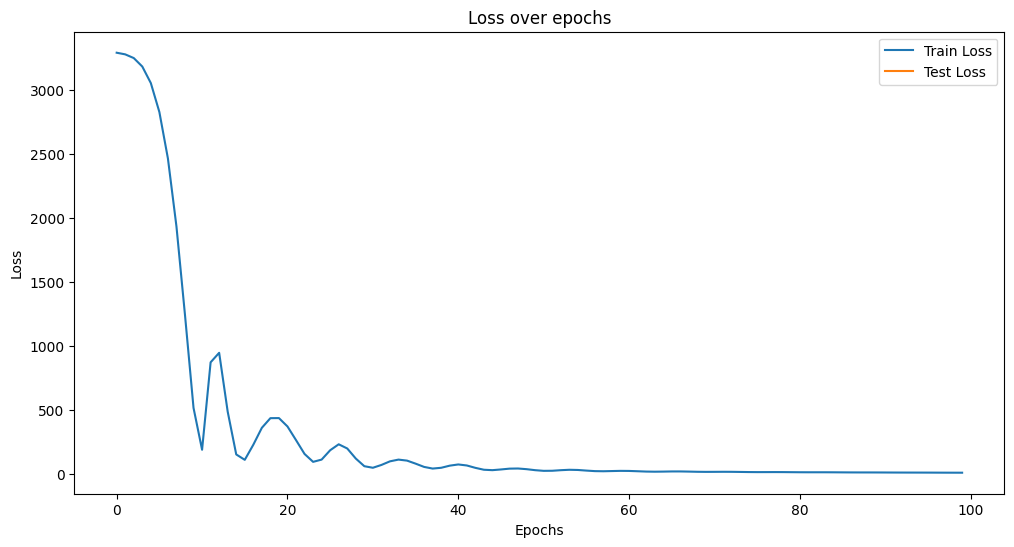

In [309]:
# Преобразуем данные в тензоры PyTorch
X_train_tensor = torch.tensor(X_train.values.astype("float32"), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.astype("float32"), dtype=torch.float32).view(-1, 1)

# Построение модели нейронной сети
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()        
        self.hidden1 = nn.Linear(input_dim, 2048)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(2048, 1024)
        self.relu2 = nn.ReLU()
        self.hidden3 = nn.Linear(1024, 512)
        self.relu3 = nn.ReLU()
        self.hidden4 = nn.Linear(512, 256)
        self.relu4 = nn.ReLU()
        self.output = nn.Linear(256, 1)

    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu1(x)
        x = self.hidden2(x)
        x = self.relu2(x)
        x = self.hidden3(x)
        x = self.relu3(x)
        x = self.hidden4(x)
        x = self.relu4(x)
        x = self.output(x)
        return x

# Инициализация модели
input_dim = X_train_tensor.shape[1]
model = NeuralNetwork(input_dim)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Эпоха [{epoch+1}/{epochs}], Потери: {loss.item():.4f}, Тест потери: {loss.item():.4f}")

# Оценка на тренировочных данных
model.eval()
with torch.no_grad():
    predictions = model(X_train_tensor)
    # Преобразуем в список Python
    predictions = predictions.detach().cpu().tolist()  # преобразование в список
    test_outputs = model(X_train_tensor)
    test_loss = criterion(test_outputs, y_train_tensor)
    test_losses.append(test_loss.item())

# Оценка качества модели
mse_nn = mean_squared_error(y_train, predictions)
r2_nn = r2_score(y_train, predictions)

# Вывод результатов
print(f"\nМодель нейронной сети:")
print(f"Среднеквадратическая ошибка (MSE): {mse_nn}")
print(f"Коэффициент детерминации (R²): {r2_nn}")
print(f"Предсказанные значения возраста (первые 5): {predictions[:5]}")


# Построение графиков потерь
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [310]:
import numpy as np

# Линейная регрессия (предсказания для линейной регрессии)
y_pred_lr = lr_model.predict(X_train)[:5]

# Случайный лес (предсказания для случайного леса)
y_pred_rf = rf_model.predict(X_train)[:5]

# Нейронная сеть (предсказания для нейронной сети)
y_pred_nn = np.array(predictions[:5]).flatten()  
# Создание DataFrame для сравнительной таблицы
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Neural Network'],
    'Prediction 1': [y_pred_lr[0], y_pred_rf[0], y_pred_nn[0]],
    'Prediction 2': [y_pred_lr[1], y_pred_rf[1], y_pred_nn[1]],
    'Prediction 3': [y_pred_lr[2], y_pred_rf[2], y_pred_nn[2]],
    'Prediction 4': [y_pred_lr[3], y_pred_rf[3], y_pred_nn[3]],
    'Prediction 5': [y_pred_lr[4], y_pred_rf[4], y_pred_nn[4]],
}

df_comparison = pd.DataFrame(data)
print(df_comparison)


               Model  Prediction 1  Prediction 2  Prediction 3  Prediction 4  \
0  Linear Regression     89.981810     77.000000     75.353224     51.967898   
1      Random Forest     88.360000     75.060000     72.160000     50.760000   
2     Neural Network     90.813118     77.039238     76.384888     51.808945   

   Prediction 5  
0     75.593337  
1     77.520000  
2     74.089745  


In [311]:
# Сравнение моделей
data = {
    "Модель": ["Линейная регрессия (LR)", "Случайный лес (RF)", "Нейронная сеть (NN)"],
    "MSE": [mse_lr, mse_rf, mse_nn],
    "R²": [r2_lr, r2_rf, r2_nn]
}

# Создание DataFrame для сравнения
df = pd.DataFrame(data)

# Отображение результатов
print("\nСравнение моделей:")
print(df)



Сравнение моделей:
                    Модель        MSE        R²
0  Линейная регрессия (LR)  12.292531  0.970938
1       Случайный лес (RF)   4.316256  0.989795
2      Нейронная сеть (NN)   9.961455  0.976449
